<a href="https://colab.research.google.com/github/psylockeh/reconhecimento-facial/blob/main/reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install tensorflow opencv-python matplotlib


!pip install dlib


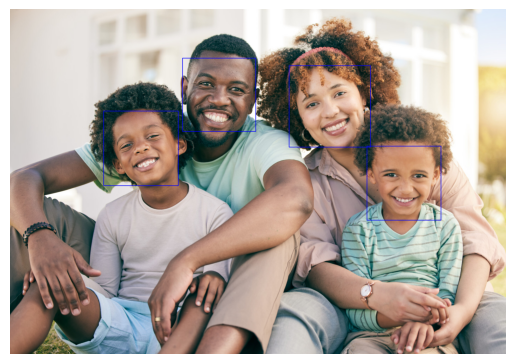

In [23]:
import cv2
import matplotlib.pyplot as plt


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


image = cv2.imread("/content/134160151_l.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=6, minSize=(80, 80))


for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [24]:

for i, (x, y, w, h) in enumerate(faces):
    face = image[y:y+h, x:x+w]
    cv2.imwrite(f"face_{i}.jpg", face)


In [25]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

model = MobileNetV2(weights="imagenet")

for i in range(len(faces)):
    face = load_img(f"face_{i}.jpg", target_size=(224, 224))
    face_array = img_to_array(face)
    face_array = preprocess_input(face_array)
    face_array = tf.expand_dims(face_array, axis=0)

    # Previsão
    predictions = model.predict(face_array)
    print(f"Face {i}: {tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Face 0: [[('n02786058', 'Band_Aid', 0.2673093)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Face 1: [[('n04584207', 'wig', 0.21198025)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Face 2: [[('n04584207', 'wig', 0.04066384)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Face 3: [[('n02786058', 'Band_Aid', 0.22861622)]]


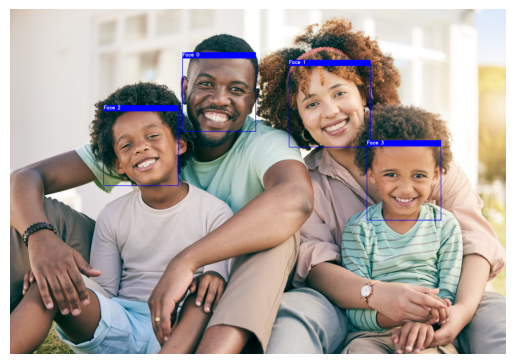

In [28]:

for i, (x, y, w, h) in enumerate(faces):
    label = f"Face {i}"

    cv2.rectangle(image, (x, y-30), (x + w, y), (255, 0, 0), -1)

    cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

